In [1]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from copairs import map
from copairs.map.average_precision import p_values
from copairs.matching import assign_reference_index
from notebook_init_utils import bandicoot_check, init_notebook

root_dir, in_notebook = init_notebook()
if in_notebook:
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

image_base_dir = bandicoot_check(
    pathlib.Path(os.path.expanduser("~/mnt/bandicoot")).resolve(), root_dir
)

In [2]:
organoid_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/organoid_normalized_convolution_profiles.parquet"
).resolve()
sc_profile_path = pathlib.Path(
    f"{root_dir}/7.technical_analysis/processed_data/sc_normalized_convolution_profiles.parquet"
).resolve()

sc_df = pd.read_parquet(sc_profile_path)
organoid_df = pd.read_parquet(organoid_profile_path)  # replace with organoid path

In [3]:
sc_df["Metadata_convolution"].unique(), organoid_df["Metadata_convolution"].unique()

(array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
        '24', '25', '50', '75', '100', '0', '-1'], dtype=object),
 array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
        '24', '25', '50', '75', '100', '0', '-1'], dtype=object))

In [4]:
for object_id in sc_df["Metadata_object_id"].unique():
    tmp_df = sc_df[sc_df["Metadata_object_id"] == object_id].copy()

    # setup the mAP
    reference_col = "Metadata_reference_index"
    df_sc_activity = assign_reference_index(
        sc_df,
        "Metadata_convolution == '0'",  # condition to get reference profiles (neg controls)
        reference_col=reference_col,
        default_value=-1,
    )
    # positive pairs are replicates of the same treatment
    pos_sameby = ["Metadata_convolution", reference_col]
    pos_diffby = []

    neg_sameby = []
    # negative pairs are replicates of different treatments
    neg_diffby = ["Metadata_convolution", reference_col]
    metadata = df_sc_activity.filter(regex="^Metadata")
    profiles = df_sc_activity.filter(regex="^(?!Metadata)").values

    activity_sc_ap = map.average_precision(
        metadata, profiles, pos_sameby, pos_diffby, neg_sameby, neg_diffby
    )
    activity_sc_ap = activity_sc_ap.query("Metadata_convolution != '0'")  # remove DMSO

    activity_map = map.mean_average_precision(
        activity_sc_ap, pos_sameby, null_size=1000000, threshold=0.05, seed=0
    )

/home/lippincm/miniforge3/envs/GFF_analysis/lib/python3.12/site-packages/copairs/compute.py:50: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

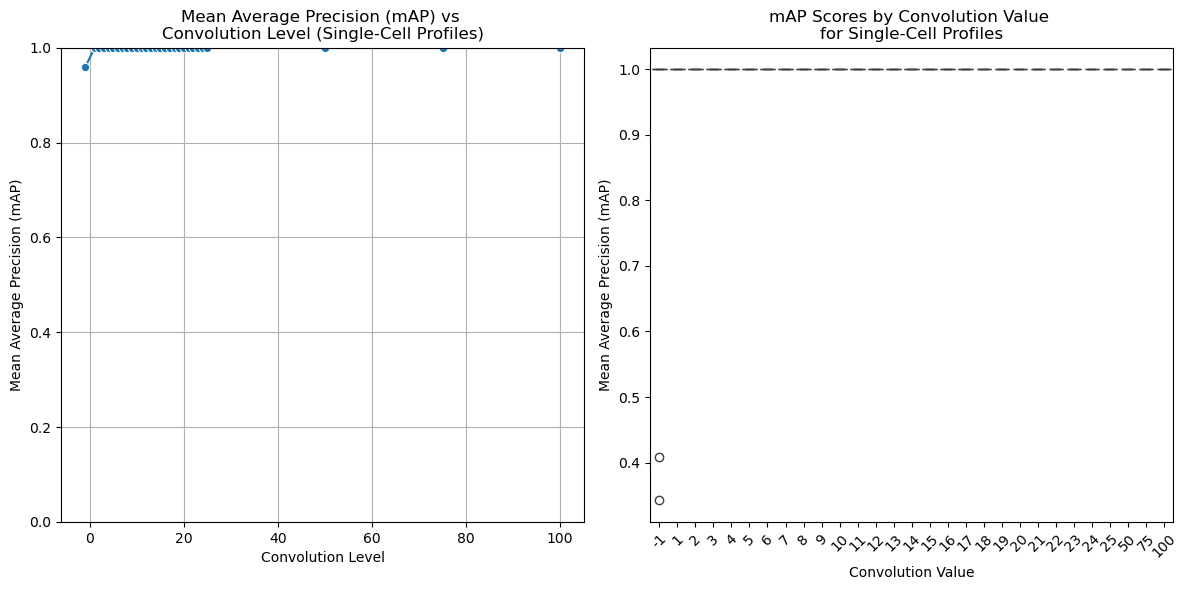

In [5]:
# plot the mAP scores against the convolution values
activity_map["Metadata_convolution"] = activity_map["Metadata_convolution"].astype(int)
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.lineplot(
    data=activity_map,
    x="Metadata_convolution",
    y="mean_average_precision",
    marker="o",
)
plt.title("Mean Average Precision (mAP) vs \nConvolution Level (Single-Cell Profiles)")
plt.xlabel("Convolution Level")
plt.ylabel("Mean Average Precision (mAP)")
plt.ylim(0, 1)
plt.grid(True)
plt.subplot(122)
sns.boxplot(
    data=activity_sc_ap,
    x="Metadata_convolution",
    y="average_precision",
    order=sorted(activity_sc_ap["Metadata_convolution"].unique(), key=int),
)
plt.xlabel("Convolution Value")
plt.ylabel("Mean Average Precision (mAP)")
plt.title("mAP Scores by Convolution Value \nfor Single-Cell Profiles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# calculate a per feature correlation between convolution levels
from scipy.stats import spearmanr

feature_correlations = {}
control_profile_df = sc_df[sc_df["Metadata_convolution"] == "0"]
comparison_profile_df = sc_df[sc_df["Metadata_convolution"] != "0"]

for convolution_level in comparison_profile_df["Metadata_convolution"].unique():
    tmp_df = comparison_profile_df[
        comparison_profile_df["Metadata_convolution"] == convolution_level
    ]
    for object_id in control_profile_df["Metadata_object_id"].unique():
        tmp_comparision_df = tmp_df[tmp_df["Metadata_object_id"] == object_id]
        tmp_control_df = control_profile_df[
            control_profile_df["Metadata_object_id"] == object_id
        ]
        correlations = []
        for feature in control_profile_df.filter(regex="^(?!Metadata)").columns:
            control_values = tmp_control_df[feature].values
            comparison_values = tmp_comparision_df[feature].values
            corr, _ = spearmanr(control_values, comparison_values)
            correlations.append(corr)
        feature_correlations[convolution_level] = correlations

In [7]:
feature_correlation_df = pd.DataFrame(
    feature_correlations, index=control_profile_df.filter(regex="^(?!Metadata)").columns
)
feature_correlation_df = feature_correlation_df.reset_index().melt(
    id_vars="index", var_name="Metadata_convolution", value_name="Spearman_correlation"
)
feature_correlation_df.head()

,index,Metadata_convolution,Spearman_correlation
0,Area.Size.Shape_Cell_CENTER.X,1,NaN
1,Area.Size.Shape_Cell_CENTER.Y,1,NaN
2,Area.Size.Shape_Cell_CENTER.Z,1,NaN
3,Area.Size.Shape_Nuclei_CENTER.X,1,NaN
4,Area.Size.Shape_Nuclei_CENTER.Y,1,NaN


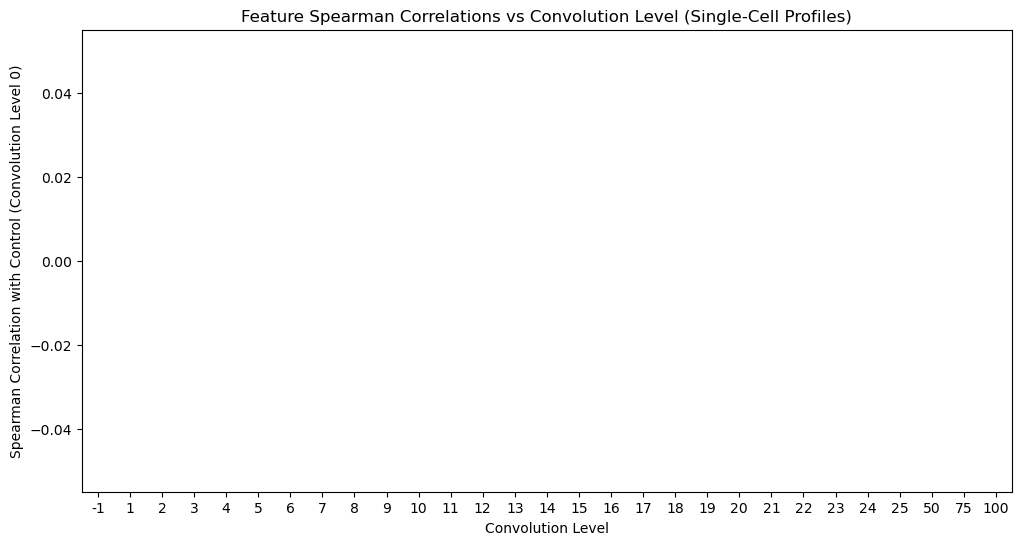

In [8]:
# plot feature correlations
plt.figure(figsize=(12, 6))
sns.boxenplot(
    data=feature_correlation_df,
    x="Metadata_convolution",
    y="Spearman_correlation",
    order=sorted(feature_correlation_df["Metadata_convolution"].unique(), key=int),
)
plt.title("Feature Spearman Correlations vs Convolution Level (Single-Cell Profiles)")
plt.xlabel("Convolution Level")
plt.ylabel("Spearman Correlation with Control (Convolution Level 0)")
plt.show()